In [1]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each data in a 8x8 image



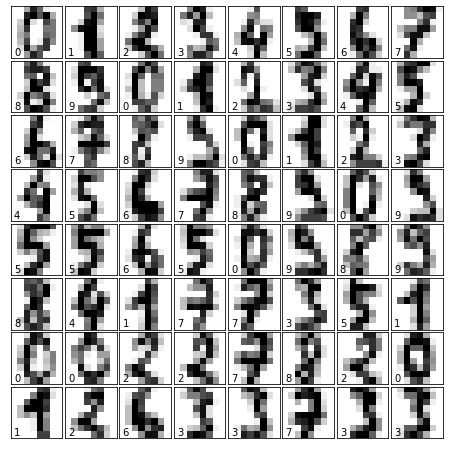

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



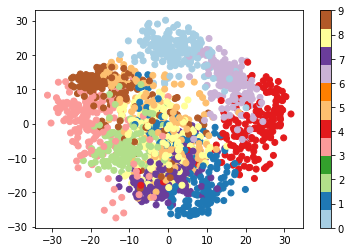

In [4]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Classify with Gaussian naive Bayes
----------------------------------



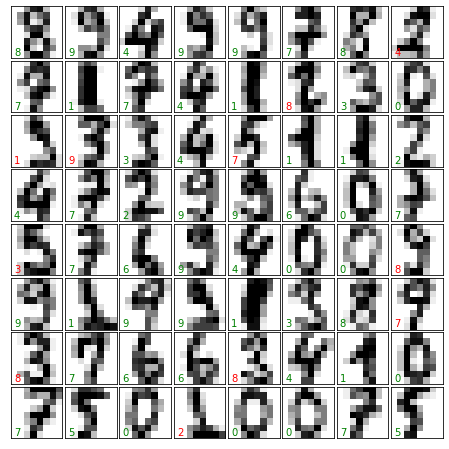

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

Quantify the performance
------------------------

First print the number of correct matches



In [6]:
matches = (predicted == expected)
print(matches.sum())

385


The total number of data points



In [7]:
print(len(matches))

450


And now, the ration of correct predictions



In [8]:
matches.sum() / float(len(matches))

0.8555555555555555

Print the classification report



In [9]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.89      0.89      0.89        44
           2       0.91      0.78      0.84        40
           3       0.90      0.76      0.82        46
           4       0.91      0.78      0.84        37
           5       0.94      0.92      0.93        51
           6       1.00      0.98      0.99        44
           7       0.66      0.95      0.78        41
           8       0.63      0.89      0.74        45
           9       0.92      0.65      0.76        54

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.88      0.86      0.86       450



Print the confusion matrix



In [10]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[47  0  0  0  1  0  0  0  0  0]
 [ 0 39  1  0  0  0  0  1  2  1]
 [ 0  2 31  1  1  0  0  0  5  0]
 [ 0  0  1 35  0  0  0  3  6  1]
 [ 1  0  0  0 29  0  0  6  1  0]
 [ 0  0  0  2  0 47  0  2  0  0]
 [ 0  0  0  0  0  1 43  0  0  0]
 [ 0  0  0  0  1  0  0 39  0  1]
 [ 0  1  0  0  0  1  0  3 40  0]
 [ 0  2  1  1  0  1  0  5  9 35]]
